# RANDOMFOREST CLASSIFIER ALGORITHEM

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Avoid unnecessary warnings, (EX: software updates, version mismatch, and so on.)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the datasets
df=pd.read_csv('cyber1.csv')

In [4]:
del df['Unnamed: 0']
del df['id.orig_p']
del df['id.resp_p']
del df['proto']
del df['service']
del df['fwd_iat.min']
del df['fwd_iat.max']
del df['fwd_iat.tot']
del df['fwd_iat.avg']
del df['fwd_iat.std']
del df['bwd_iat.min']
del df['bwd_iat.max']
del df['bwd_iat.tot']
del df['bwd_iat.avg']
del df['bwd_iat.std']
del df['flow_iat.min']
del df['flow_iat.max']
del df['flow_iat.tot']
del df['flow_iat.avg']
del df['flow_iat.std']
del df['payload_bytes_per_second']
del df['fwd_subflow_pkts']
del df['bwd_subflow_pkts']
del df['fwd_subflow_bytes']
del df['bwd_subflow_bytes']
del df['fwd_bulk_bytes']
del df['bwd_bulk_bytes']
del df['active.min']
del df['active.max']
del df['active.tot']
del df['active.avg']
del df['active.std']
del df['idle.min']
del df['idle.max']
del df['idle.tot']
del df['idle.avg']
del df['idle.std']


In [5]:
# Check the columns of dataset
df.columns

Index(['flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       'flow_pkts_payload.avg', 'flow_pkts_payload.std', 'fwd

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   flow_duration          123117 non-null  float64
 1   fwd_pkts_tot           123117 non-null  int64  
 2   bwd_pkts_tot           123117 non-null  int64  
 3   fwd_data_pkts_tot      123117 non-null  int64  
 4   bwd_data_pkts_tot      123117 non-null  int64  
 5   fwd_pkts_per_sec       123117 non-null  float64
 6   bwd_pkts_per_sec       123117 non-null  float64
 7   flow_pkts_per_sec      123117 non-null  float64
 8   down_up_ratio          123117 non-null  float64
 9   fwd_header_size_tot    123117 non-null  int64  
 10  fwd_header_size_min    123117 non-null  int64  
 11  fwd_header_size_max    123117 non-null  int64  
 12  bwd_header_size_tot    123117 non-null  int64  
 13  bwd_header_size_min    123117 non-null  int64  
 14  bwd_header_size_max    123117 non-nu

In [7]:
# Check the top5 values
df.head()

,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,...,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,32.011598,9,5,3,3,0.281148,0.156193,0.437341,0.555556,296,...,7.714286,11.618477,0.0,0.0,0.0,0.0,64240,26847,502,MQTT_Publish
1,31.883584,9,5,3,3,0.282277,0.156821,0.439097,0.555556,296,...,7.714286,11.618477,0.0,0.0,0.0,0.0,64240,26847,502,MQTT_Publish
2,32.124053,9,5,3,3,0.280164,0.155647,0.435811,0.555556,296,...,7.428571,11.229866,0.0,0.0,0.0,0.0,64240,26847,502,MQTT_Publish
3,31.961063,9,5,3,3,0.281593,0.156440,0.438033,0.555556,296,...,7.428571,11.229866,0.0,0.0,0.0,0.0,64240,26847,502,MQTT_Publish
4,31.902362,9,5,3,3,0.282111,0.156728,0.438839,0.555556,296,...,7.714286,11.618477,0.0,0.0,0.0,0.0,64240,26847,502,MQTT_Publish


In [8]:
# Remove the null value
df=df.dropna()

In [9]:
df['Attack_type'].value_counts()

Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

In [10]:
# Transform the columns value(ex: int to str, str to int) for classification purpose.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Attack_type']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [11]:
df['Attack_type'].value_counts()

Attack_type
2     94659
10     8108
0      7750
3      4146
8      2590
9      2010
6      2000
7      1002
1       534
11      253
4        37
5        28
Name: count, dtype: int64

In [12]:
# Check the top5 values
df.head()

,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,...,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,32.011598,9,5,3,3,0.281148,0.156193,0.437341,0.555556,296,...,7.714286,11.618477,0.0,0.0,0.0,0.0,64240,26847,502,3
1,31.883584,9,5,3,3,0.282277,0.156821,0.439097,0.555556,296,...,7.714286,11.618477,0.0,0.0,0.0,0.0,64240,26847,502,3
2,32.124053,9,5,3,3,0.280164,0.155647,0.435811,0.555556,296,...,7.428571,11.229866,0.0,0.0,0.0,0.0,64240,26847,502,3
3,31.961063,9,5,3,3,0.281593,0.156440,0.438033,0.555556,296,...,7.428571,11.229866,0.0,0.0,0.0,0.0,64240,26847,502,3
4,31.902362,9,5,3,3,0.282111,0.156728,0.438839,0.555556,296,...,7.714286,11.618477,0.0,0.0,0.0,0.0,64240,26847,502,3


In [13]:
# Split the datasets into depended and independed variable
# X is independend variable (Input features)
x1 = df.drop(labels='Attack_type', axis=1)

# Y is dependend variable (Target variable)
y1 = df.loc[:,'Attack_type']

In [14]:
# This process execute to balanced the datasets features.
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({2: 94659, 10: 8108, 0: 7750, 3: 4146, 8: 2590, 9: 2010, 6: 2000, 7: 1002, 1: 534, 11: 253, 4: 37, 5: 28})
OVER SAMPLING DATA COUNT  :  Counter({3: 94659, 10: 94659, 11: 94659, 0: 94659, 1: 94659, 2: 94659, 4: 94659, 5: 94659, 6: 94659, 7: 94659, 8: 94659, 9: 94659})


In [15]:
# Split the datasets into two parts like trainng and testing variable.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  908726
NUMBER OF TEST DATASET      :  227182
TOTAL NUMBER OF DATASET    :  1135908


In [16]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  908726
NUMBER OF TEST DATASET      :  227182
TOTAL NUMBER OF DATASET    :  1135908


In [17]:
# Implement Catboost classifier algorithm learning patterns
from sklearn.ensemble import RandomForestClassifier

In [18]:
RFR = RandomForestClassifier()
RFR.fit(x_train, y_train)

RandomForestClassifier()

In [19]:
# Predict is the test function for this algorithm
predicted = RFR.predict(x_test)

In [20]:
# Check classification report for this algorithm
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF RANDOMFOREST CLASSIFIER:\n\n',cr)

THE CLASSIFICATION REPORT OF RANDOMFOREST CLASSIFIER:

               precision    recall  f1-score   support

           0       0.98      0.97      0.98     18932
           1       0.98      1.00      0.99     18932
           2       1.00      1.00      1.00     18932
           3       1.00      1.00      1.00     18932
           4       1.00      1.00      1.00     18932
           5       1.00      1.00      1.00     18932
           6       1.00      1.00      1.00     18932
           7       1.00      1.00      1.00     18932
           8       0.97      0.98      0.98     18932
           9       1.00      1.00      1.00     18931
          10       1.00      0.99      0.99     18931
          11       1.00      1.00      1.00     18932

    accuracy                           0.99    227182
   macro avg       0.99      0.99      0.99    227182
weighted avg       0.99      0.99      0.99    227182



In [21]:
# Check the confusion matrix for this algorithms.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOMFOREST CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF RANDOMFOREST CLASSIFIER:


 [[18453     0     0     0     0     0     0     0   478     0     1     0]
 [   28 18904     0     0     0     0     0     0     0     0     0     0]
 [    0     0 18932     0     0     0     0     0     0     0     0     0]
 [    0     0     0 18932     0     0     0     0     0     0     0     0]
 [    0     0     0     0 18932     0     0     0     0     0     0     0]
 [    0     0     0     0     0 18932     0     0     0     0     0     0]
 [    0     0     0     0     0     0 18932     0     0     0     0     0]
 [    0     0     0     0     0     0     0 18932     0     0     0     0]
 [   90   335     0     0     9     0     0     0 18498     0     0     0]
 [    0     0     0     0     0     0     0     0     0 18931     0     0]
 [  196     0     0     0     0     0     0     0    29     0 18706     0]
 [    0     0     0     0     0     0     0     0     0     0     0 18932]]


In [22]:
# Check the cross value score of this algorithm.
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(RFR, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [99.48807564 99.48323371 99.4942381  99.49643676 99.49159481]


In [23]:
# Check the accuracy score of this algorithms.
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF RANDOMFOREST CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF RANDOMFOREST CLASSIFIER IS : 99.48675511264096


In [24]:
# Check the hamming loss of this algorithm.
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF RANDOMFOREST CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF RANDOMFOREST CLASSIFIER IS : 0.5132448873590337


THE CONFUSION MATRIX SCORE OF RANDOMFOREST CLASSIFIER:


[[18453     0     0     0     0     0     0     0   478     0     1     0]
 [   28 18904     0     0     0     0     0     0     0     0     0     0]
 [    0     0 18932     0     0     0     0     0     0     0     0     0]
 [    0     0     0 18932     0     0     0     0     0     0     0     0]
 [    0     0     0     0 18932     0     0     0     0     0     0     0]
 [    0     0     0     0     0 18932     0     0     0     0     0     0]
 [    0     0     0     0     0     0 18932     0     0     0     0     0]
 [    0     0     0     0     0     0     0 18932     0     0     0     0]
 [   90   335     0     0     9     0     0     0 18498     0     0     0]
 [    0     0     0     0     0     0     0     0     0 18931     0     0]
 [  196     0     0     0     0     0     0     0    29     0 18706     0]
 [    0     0     0     0     0     0     0     0     0     0     0 18932]]


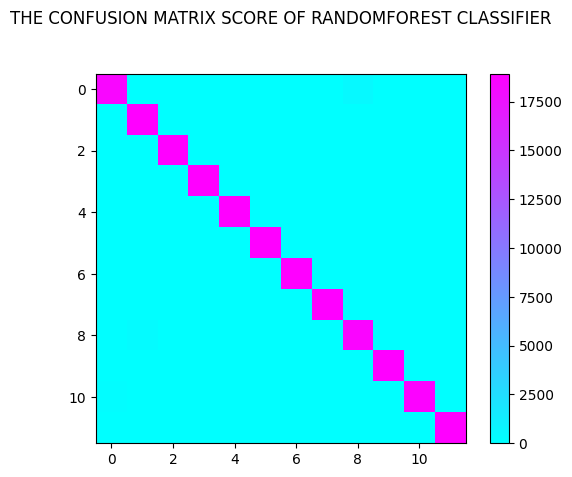

In [25]:
# Plot a Confusion matrix for this algorithms.
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF RANDOMFOREST CLASSIFIER\n\n', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOMFOREST CLASSIFIER:\n\n')
print(cm)
plot_confusion_matrix(cm)

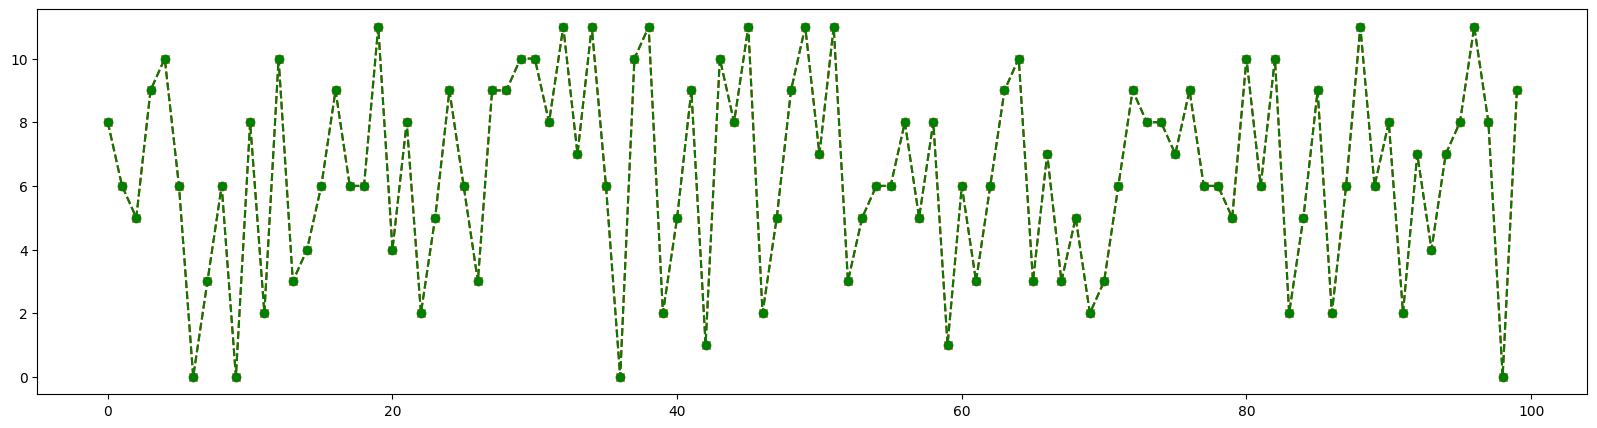

In [26]:
# Plot the worm plot for this model.
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [27]:
# Build a model in catboosting algorithms
import joblib
joblib.dump(RFR, 'CYBER.pkl')

['CYBER.pkl']